In [136]:
import pandas as pd
import requests
import os
from bs4 import BeautifulSoup
from time import sleep
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
font_path = 'malgun.ttf'
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font_name)

In [14]:
# NaN(Not a Number, 결측치) : 측정되지 않은 데이터
df = pd.read_excel('excel/시도별_전출입_인구수.xlsx')
df = df.drop(0, axis = 'index')
df['전출지별'] = df['전출지별'].ffill()
df = df.rename({'전출지별':'전출지', '전입지별':'전입지'}, axis = 'columns')
df.head(3)

,전출지,전입지,1970,1971,1972,1973,1974,1975,1976,1977,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,7629098,7755286,7378430,7154226,7297099,7104398,7735491,7213422,6152155,6128738
2,전국,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,1573594,1589431,1515602,1472937,1439707,1426493,1578127,1418187,1201527,1206963
3,전국,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,485710,507031,459015,439073,416095,411704,491829,441323,383848,364271


In [23]:
df2 = df.iloc[18:35]
df2 = df2.drop(20, axis = 'index')
df2 = df2.drop('전출지', axis = 'columns')
df2 = df2.set_index('전입지')
df2

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
전입지,,,,,,,,,,,,,,,,,,,,,
전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,...,1661425,1726687,1655859,1571423,1549937,1476081,1642977,1524430,1236867,1238213
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,...,17320,17009,15062,14484,13093,12805,13209,13078,11532,11748
대구광역시,-,-,-,-,-,-,-,-,-,-,...,10062,10191,9623,8891,8446,7897,8792,8350,7716,8289
인천광역시,-,-,-,-,-,-,-,-,-,-,...,43212,44915,43745,40485,41233,38571,39875,44859,43887,45942
광주광역시,-,-,-,-,-,-,-,-,-,-,...,9759,9216,8354,7932,7378,7014,7178,7145,6159,6120
대전광역시,-,-,-,-,-,-,-,-,-,-,...,13403,13453,12619,11815,11591,10759,11033,11144,10454,10234
울산광역시,-,-,-,-,-,-,-,-,-,-,...,6047,5950,5102,4260,4086,3827,4085,4065,3584,3655
세종특별자치시,-,-,-,-,-,-,-,-,-,-,...,6481,7550,5943,5813,5861,5919,5546,5580,4892,4301
경기도,130149,150313,93333,143234,149045,253705,202276,207722,237684,278411,...,332785,359337,370760,342433,368536,334293,375867,362116,279731,279375


In [37]:
mask = (df['전출지'] == '서울특별시') & (df['전입지'] != '서울특별시')
df3 = df[mask]
df3 = df3.drop('전출지', axis = 'columns')
df3 = df3.set_index('전입지')
df3.head(3)

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
전입지,,,,,,,,,,,,,,,,,,,,,
전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,...,1661425,1726687,1655859,1571423,1549937,1476081,1642977,1524430,1236867,1238213
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,...,17320,17009,15062,14484,13093,12805,13209,13078,11532,11748
대구광역시,-,-,-,-,-,-,-,-,-,-,...,10062,10191,9623,8891,8446,7897,8792,8350,7716,8289


Index(['1970', '1971', '1972', '1973', '1974'], dtype='object')
1970    130149
1971    150313
1972     93333
1973    143234
1974    149045
Name: 경기도, dtype: int64


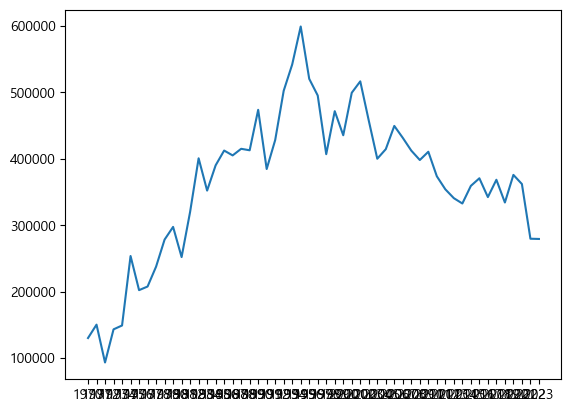

In [55]:
# 서울특별시에서 전출하여 '경기도'로 전입한 정보 조회 -> Series
sr1 = df3.loc['경기도']
sr1 = sr1.map(int)
print(sr1.index[:5])
print(sr1[:5])

# plt(matplotlib.pyplot)
# plt.plot(시리즈)              : 선그래프, 시리즈의 index가 x축
#                                           시리즈의 values가 데이터
# plt.plt(X축, 데이터)          : 선그래프, 앞의 데이터가 X축
#                                           뒷의 데이터가 데이터
year = sr1.index
data = sr1.values
#plt.plot(year, data)
plt.plot( sr1 )

Text(0.5, 1.0, '서울시 -> 경기도 인구 이동')

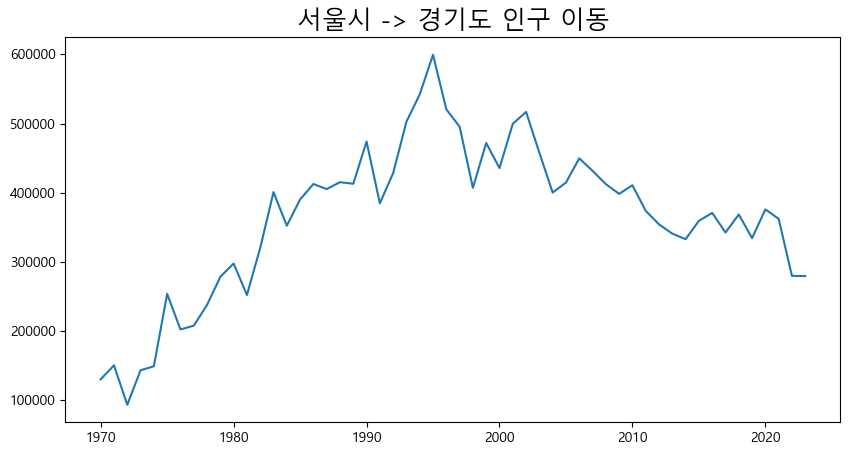

In [69]:
# X축 데이터가 문자인 경우 모든 값을 나열하여 겹치는 증상이 보이는 경우가 많다.
# X축 데이터가 수치자료(정수,실수)가 가깝다면 수정해서 그래프를 그리는 것이 좋다.
sr1.index = sr1.index.map(int)
plt.figure(figsize = (10, 5))
plt.plot(sr1)
plt.title('서울시 -> 경기도 인구 이동', size = 18)

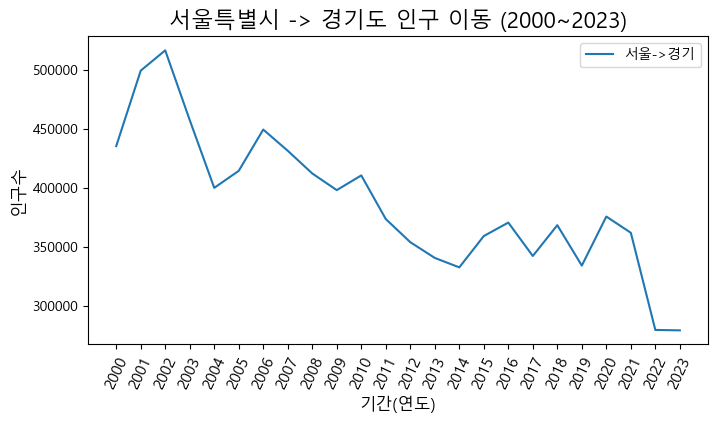

In [125]:
sr2 = df3.loc['경기도']
sr2 = sr2.map(int)

# 2000 ~ 2023 사이에 서울 -> 경기 인구 이동
sr2 = sr2['2000':]

# 1. 모형의 크기
plt.figure(figsize = (8, 4))

# 2. 그래프 그리기
plt.plot(sr2, label = '서울->경기')

# 3. 그래프 꾸미기
plt.title('서울특별시 -> 경기도 인구 이동 (2000~2023)', size = 16)
plt.xticks(rotation = 65, size = 11)
#plt.yticks(rotation = 65, size = 11)
plt.xlabel('기간(연도)', size = 12)
plt.ylabel('인구수', size = 12)
plt.legend(loc = 'best')

# 4. 그래프 출력 및 저장
plt.show()

In [131]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


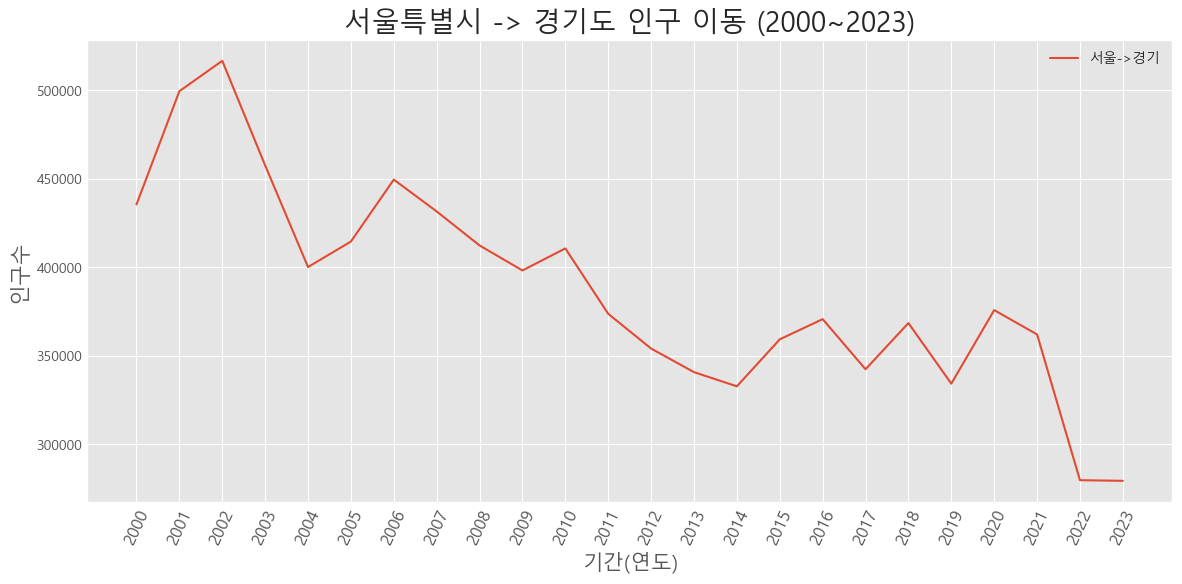

In [138]:
# 0. 테마(스타일) 지정
plt.style.use('ggplot')

# 1. 모형의 크기
plt.figure(figsize = (14, 6))

# 2. 그래프 그리기
plt.plot(sr2, label = '서울->경기')

# 3. 그래프 꾸미기
plt.title('서울특별시 -> 경기도 인구 이동 (2000~2023)', size = 20)
plt.xticks(rotation = 65, size = 12)
#plt.yticks(rotation = 65, size = 12)
plt.xlabel('기간(연도)', size = 15)
plt.ylabel('인구수', size = 15)
plt.legend(loc = 'best')

# 4. 그래프 출력 및 저장
plt.show()

Text(0.5, 1.0, '제목2')

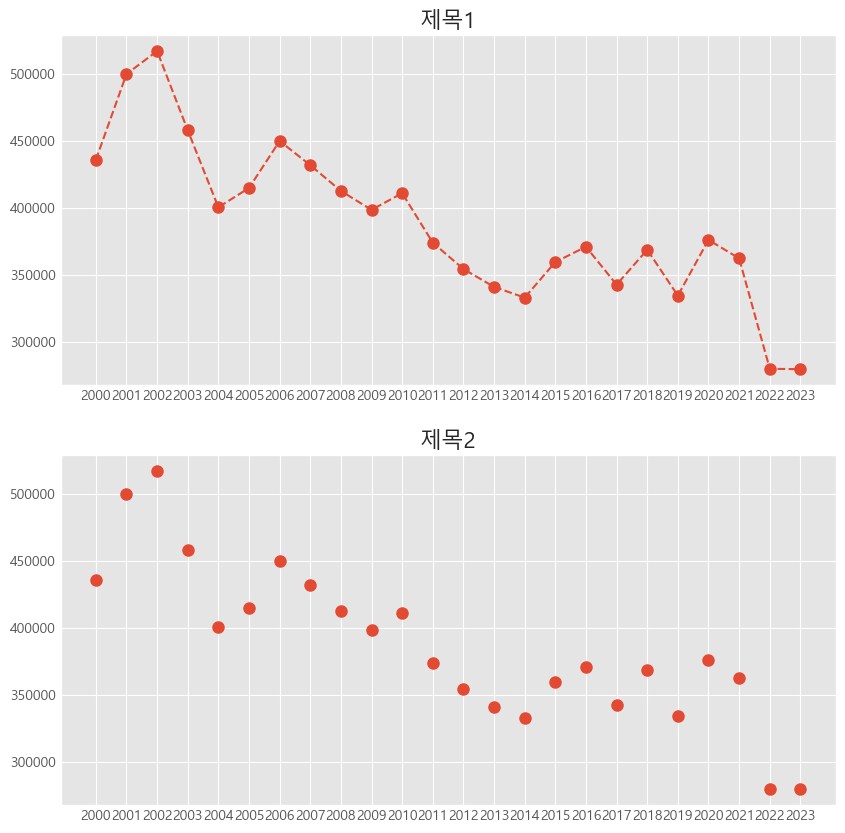

In [156]:
figure = plt.figure(figsize = (10, 10))
ax1 = figure.add_subplot(2, 1, 1)
ax2 = figure.add_subplot(2, 1, 2)
ax1.plot(sr2, ls = '--', marker = 'o', markersize = 8)
ax2.plot(sr2, 'o', markersize = 8)
ax1.set_title('제목1', size = 16)
ax2.set_title('제목2', size = 16)